In [1]:
import analysis_utils
from matplotlib import pyplot as plt
import data_process
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import mmwave
from sklearn.cluster import DBSCAN
from scipy.ndimage import gaussian_filter1d
import seaborn as sns

#### with filtering

In [7]:
person0 = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
person1 = [2, 1, 2, 1, 1, 1, 2, 1, 1, 2]
person2 = [3, 3, 3, 1, 2, 1, 2, 2, 2, 4]
person3 = [3, 3, 3, 2, 2, 6, 3, 3, 3, 3]
res = np.array([[7,3,0,0,0,0,0],[0,6,4,0,0,0,0],[0,2,4,3,1,0,0],[0,0,2,7,0,0,1]],dtype=np.float_)
print("Confusion Matrix:")

for i in range(res.shape[0]):
    res[i]/=np.sum(res[i])

Confusion Matrix:


In [4]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

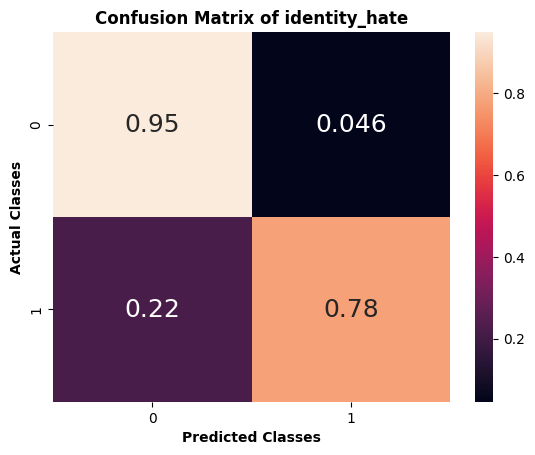

In [11]:
res = np.array([[0.95,0.046],[0.22,0.78]])
fig = sns.heatmap(res, annot=True,
                    annot_kws={'size': 18})
fig.set_title(f'Confusion Matrix of identity_hate', fontweight='bold')
fig.set_xlabel('Predicted Classes', fontweight='bold')
fig.set_ylabel('Actual Classes', fontweight='bold')

#plt.tight_layout()

plt.show()

Text(50.722222222222214, 0.5, 'True label')

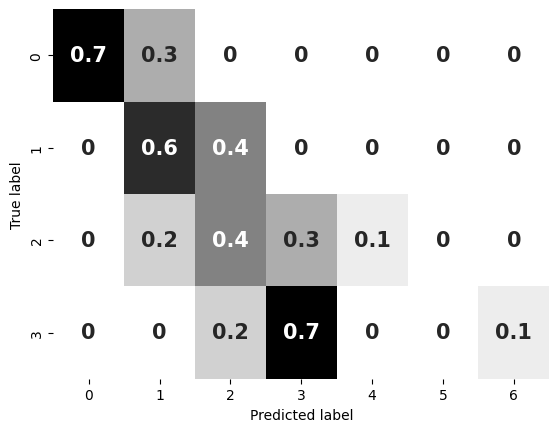

In [20]:
sns.heatmap(res,cmap="Greys",annot=True,cbar=False,annot_kws={"weight":"bold","size":15})
plt.xlabel('Predicted label')
plt.ylabel('True label')

**if we consider +- 1 difference:**

**0 person: 1.0**

**1 person: 1.0**

**2 person: 0.9**

**3 person: 0.9**

In [3]:
for i in range(len(res)):
    MAE=0
    for j in range(len(res[i])):
        MAE+=(res[i][j])*(np.abs(j-i))
    print(f'MAE for {i} People/Person:{MAE/10}')

MAE for 0 People/Person:0.3
MAE for 1 People/Person:0.4
MAE for 2 People/Person:0.7
MAE for 3 People/Person:0.5


Average MAE = 0.475

#### No filtering

In [22]:
person0 = [0, 1, 0, 0, 1, 2, 0, 1, 4, 2]
person1 = [4, 3, 5, 4, 4, 2, 2, 1, 1, 3]
person2 = [3, 5, 5, 3, 3, 2, 3, 6, 3, 4]
person3 = [3, 2, 3, 4, 2, 7, 1, 3, 5, 2]
res = np.array([[4,3,2,0,1,0,0,0],[0,2,2,2,3,1,0,0],[0,0,1,5,1,2,1,0],[0,1,3,3,1,1,0,1]],dtype=np.float_)
print("Confusion Matrix:")
for i in range(res.shape[0]):
    res[i]/=np.sum(res[i])

Confusion Matrix:


Text(50.722222222222214, 0.5, 'True label')

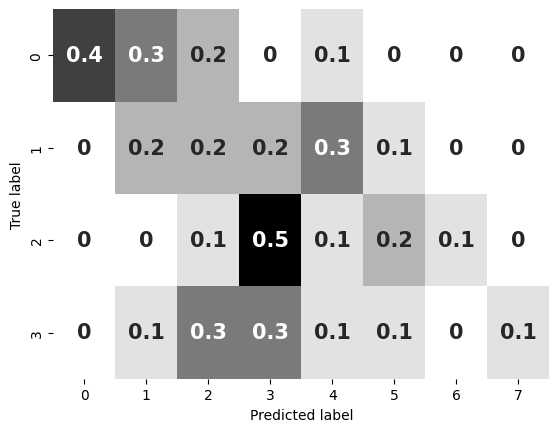

In [23]:
sns.heatmap(res,cmap="Greys",annot=True,cbar=False,annot_kws={"weight":"bold","size":15})
plt.xlabel('Predicted label')
plt.ylabel('True label')

**if we consider +- 1 difference:**

**0 person: 0.7**

**1 person: 0.4**

**2 person: 0.6**

**3 person: 0.7**

In [5]:
for i in range(len(res)):
    MAE=0
    for j in range(len(res[i])):
        MAE+=(res[i][j])*(np.abs(j-i))
    print(f'MAE for {i} People/Person:{MAE/10}')

MAE for 0 People/Person:1.1
MAE for 1 People/Person:1.9
MAE for 2 People/Person:1.7
MAE for 3 People/Person:1.2


**Average MAE: 1.475**

#### Coordinate Approximation

Groudtruth: (0, 1.4)

person1 = [2, 1, 2, 1, 1, 1, 2, 1, 1, 2]

{'1': [0.6620969582090964, 1.1446165930850318], '0': [-0.0013627885870320464, 1.3507567340157691]}
{'0': [0.007681803008749814, 1.3755141590872255]}
{'1': [1.1549063854663562, 2.0209377558807033], '0': [-0.006644655553608989, 1.3129080562709194]}
{'0': [-0.005900754242207176, 1.2649948503290016]}
{'0': [-0.0015275070265444936, 1.3127638091784561]}
{'0': [0.007576702800413897, 1.3687036126303336]}
{'1': [0.014265513809342944, 2.22051089105538], '0': [0.019249960714059735, 1.3037721150964787]}
{'0': [0.006356209049970081, 1.3910381006377628]}
{'0': [0.0014835195474998473, 1.4010165962866634]}
{'1': [-0.0046112445894914405, 1.402129245753029], '0': [-0.9807343279028302, 1.6498489131020981]}


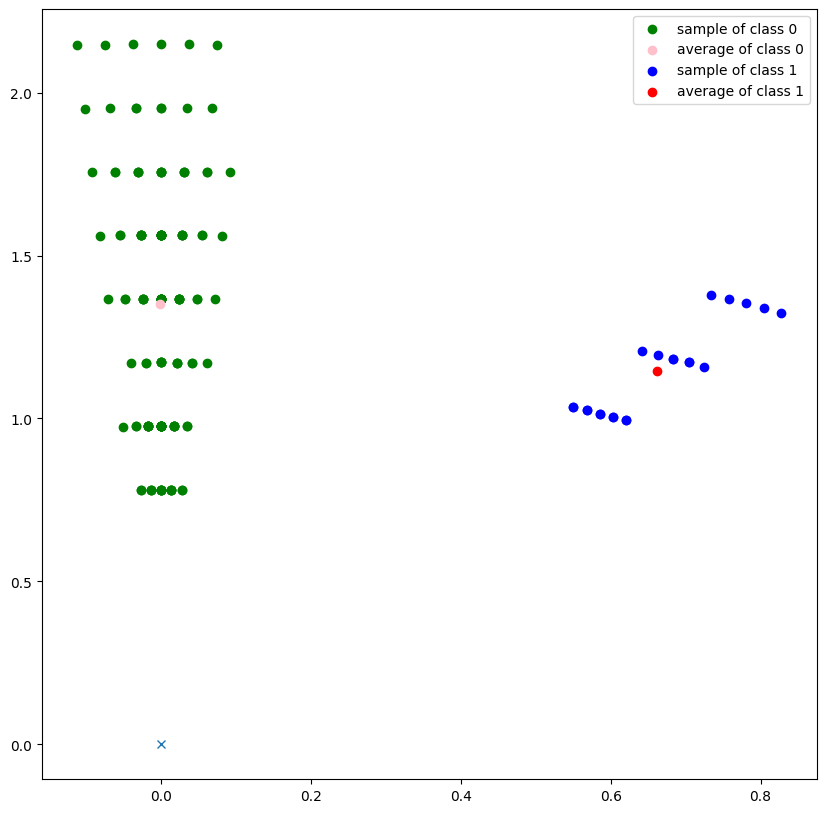

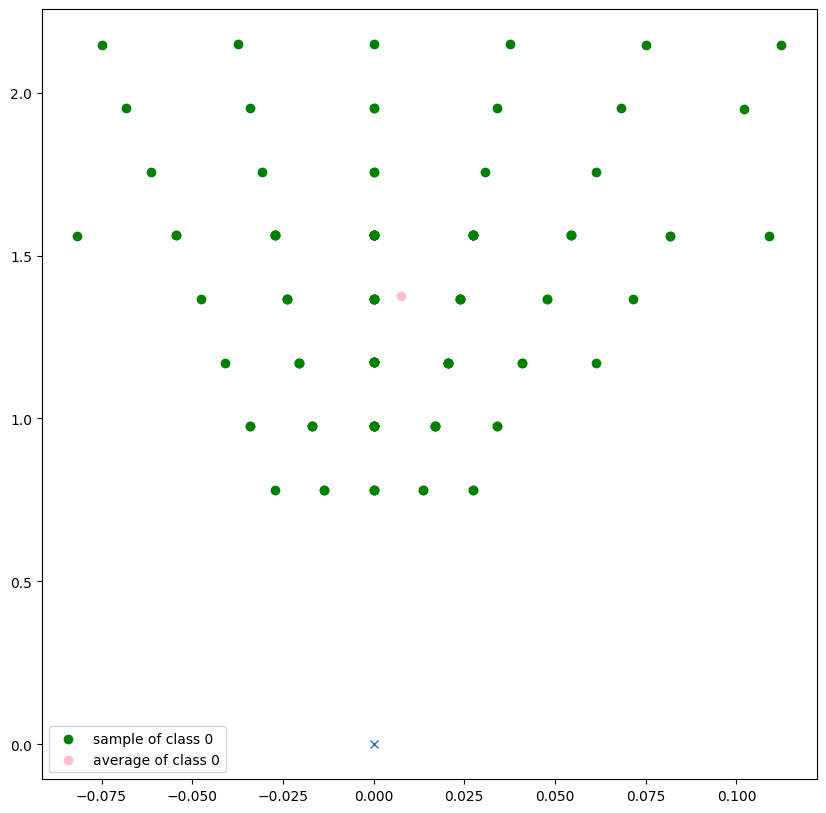

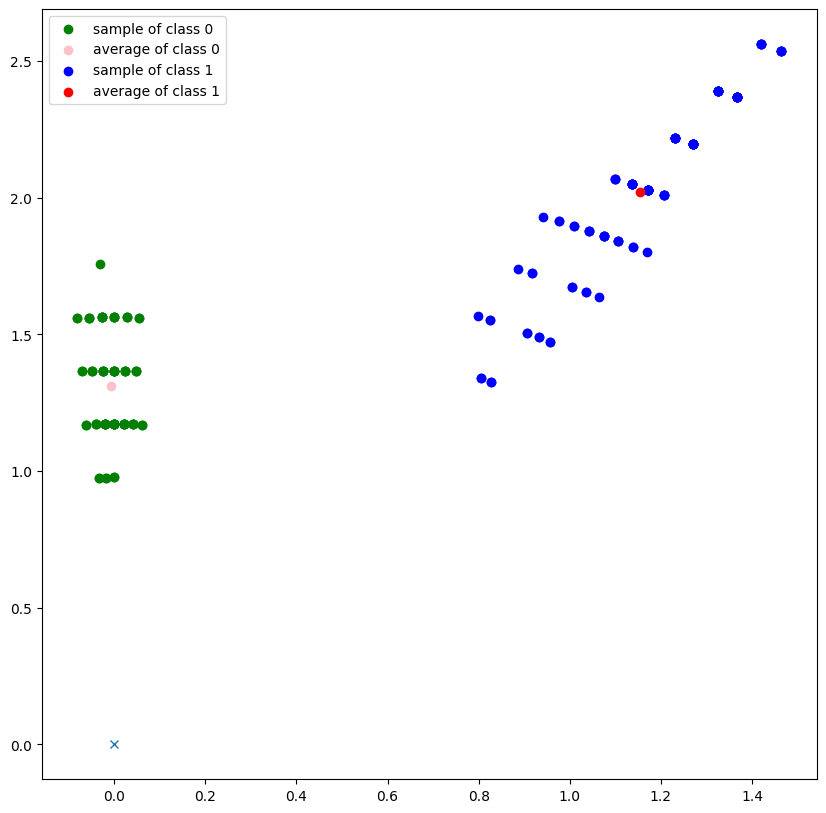

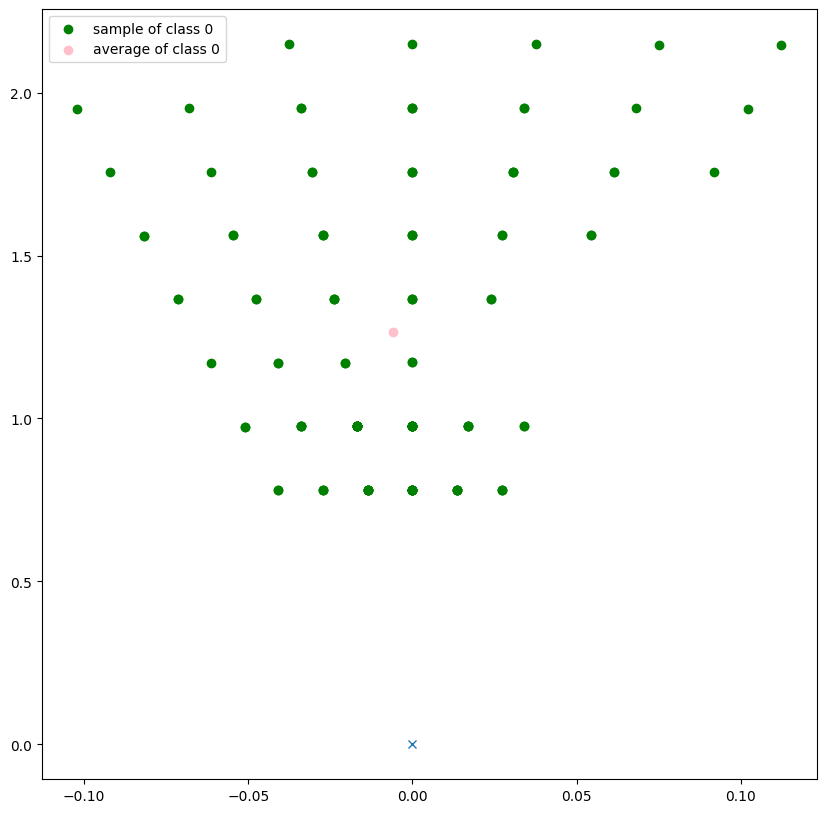

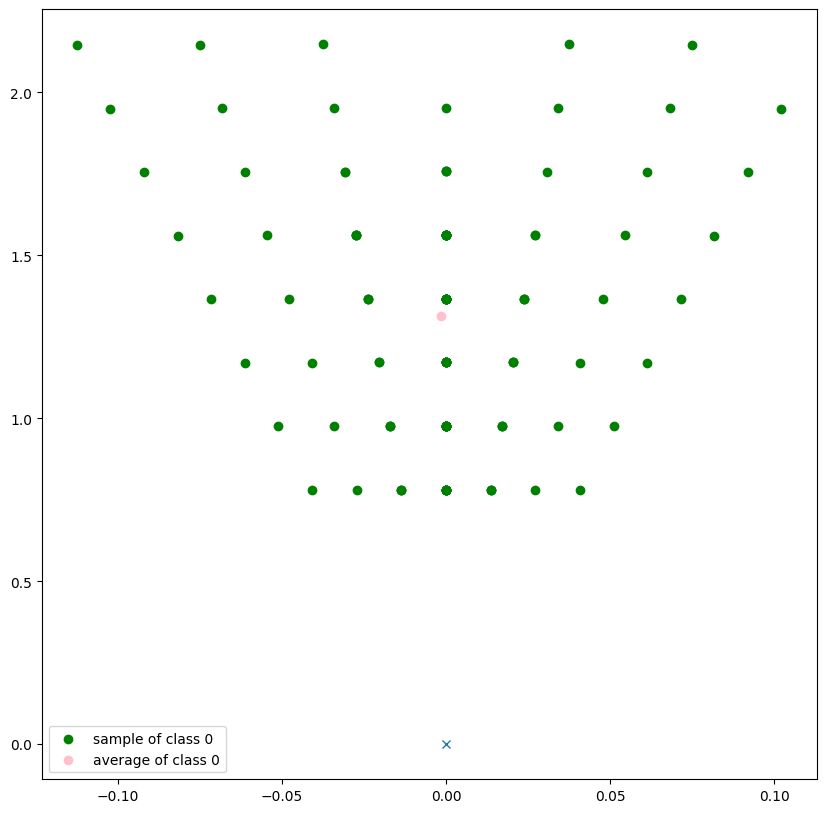

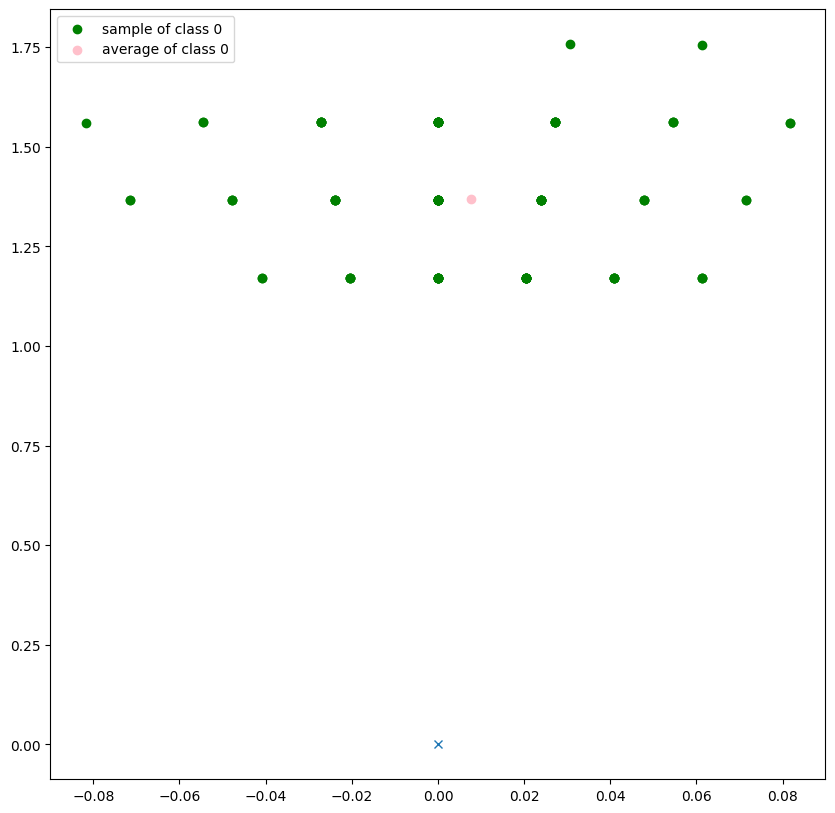

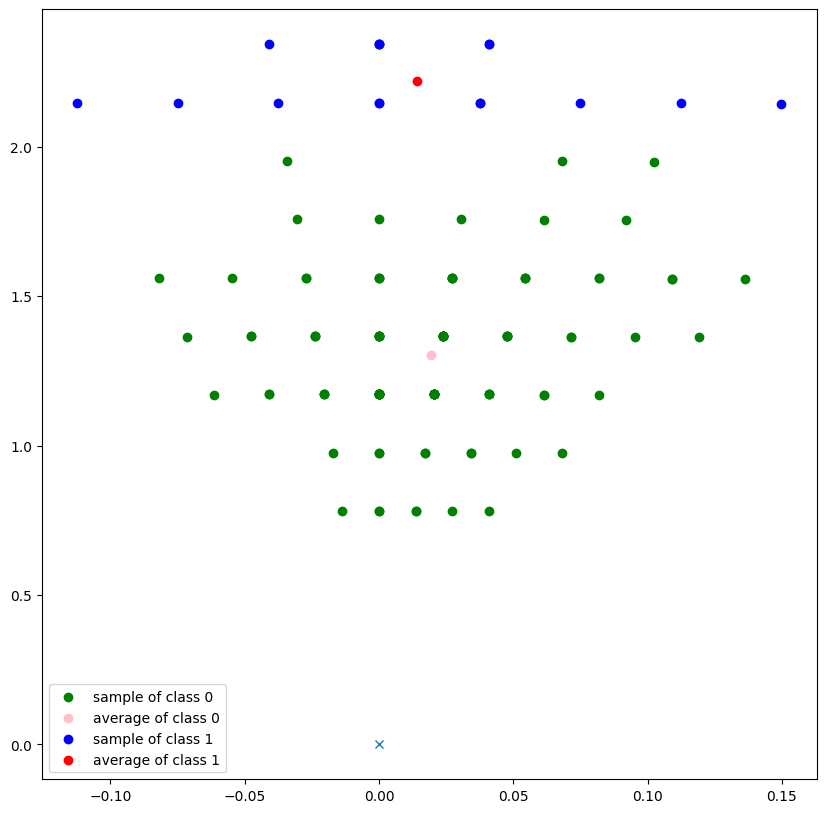

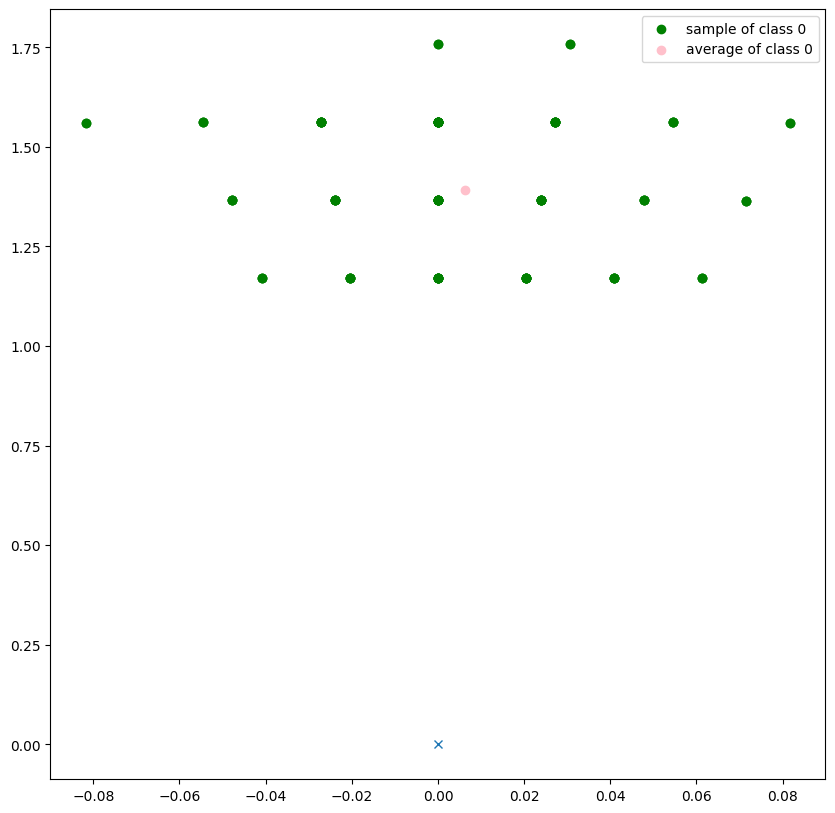

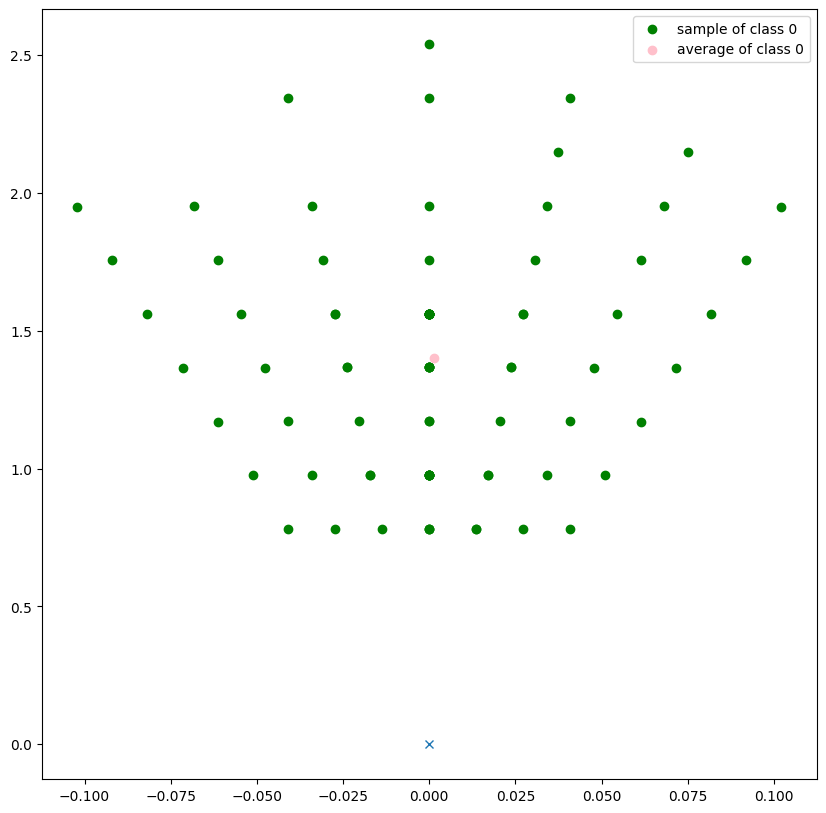

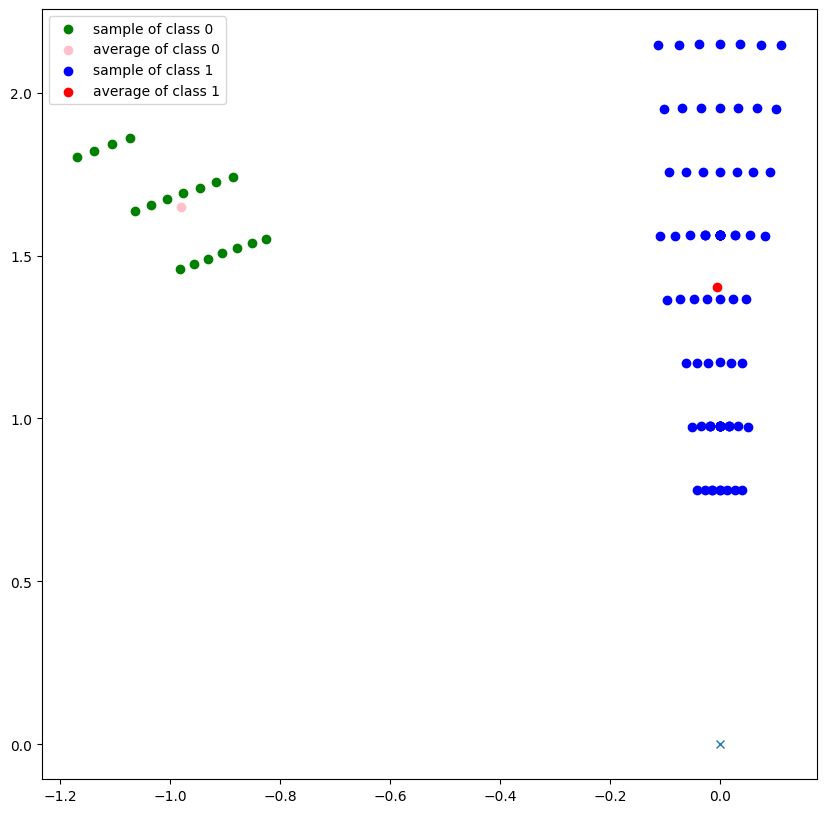

In [14]:
def dbscan(category):
    centroids=[]
    for k in range(1,11):
        path=f'{category}/{category}-{k}.mat'
        f=data_process.data(path)

        heatmap = analysis_utils.range_angle_heatmap(f)

        #heatmap = np.log2(heatmap)
        ranges,angles,pairs = analysis_utils.peak_finding_cfar(
                    heatmap=heatmap, l_bound = np.mean(heatmap)+2*np.std(heatmap),
                    guard_len=6, noise_len=12,scale_a=3.15,scale_r=3)

        size = []
        heatmap = (heatmap-np.min(heatmap))/(np.max(heatmap) - np.min(heatmap))
        for p in pairs:
            size.append(int(heatmap[p[0]][p[1]]*10)+1)

        coords = analysis_utils.coord(ranges,angles)

        dots = []
        #print(size)
        for i in range(len(coords)):
            #if size[i]>np.quantile(size,0.8):
            for j in range(size[i]):
                dots.append(list(coords[i]))
        #print(len(dots))
        #print(np.quantile(size,0.95)*2)
        # if len(dots)>0:
        #     #print(np.quantile(size,0.9))
        #     cl = DBSCAN(0.2,min_samples=int(min(np.quantile(size,0.95)*2,20))).fit(dots)
        #     print(cl.labels_)
        #     if np.max(cl.labels_)==-1:
        #         print(0)
        #     else:
        #         print(np.max(cl.labels_)+1)
        # else:
        #     print(0)
        # print('*'*10)

        one = []
        zero = []
        ignore = []
        centroid={}
        if len(dots) > 0:
            fig, axs = plt.subplots(1,1,figsize=(10,10))
            cl = DBSCAN(0.2,min_samples=int(min(np.quantile(size,0.95)*2,20))).fit(dots)
            #print(cl.labels_)
            for i in range(len(dots)):
                if cl.labels_[i] == -1:
                    #dots[i] = np.nan
                    ignore.append(dots[i])
                elif cl.labels_[i] == 0:
                    zero.append(dots[i])
                elif cl.labels_[i] == 1:
                    one.append(dots[i])
            #print(zero)
            #print(one)
            dots = np.array(dots)
            zero = np.array(zero)
            one = np.array(one)
            if one.size != 0:
                mean1x = np.mean(one[:,0])
                mean1y = np.mean(one[:,1])
                centroid['1']=[mean1x,mean1y]
            if zero.size != 0:
                mean0x = np.mean(zero[:,0])
                mean0y = np.mean(zero[:,1])
                centroid['0']=[mean0x,mean0y]
            # axs[k,1].scatter(dots[:,0],dots[:,1])
            # axs[k,1].scatter(c,d, color = 'red')
            # axs[k,1].plot([0],[0],marker='x')
            centroids.append(centroid)
            print(centroid)
            if zero.size != 0: 
                plt.scatter(zero[:,0],zero[:,1], color = 'green', label = 'sample of class 0')
                plt.scatter(mean0x,mean0y, color = 'pink', label = 'average of class 0')
            if one.size != 0: 
                plt.scatter(one[:,0],one[:,1], color = 'blue', label = 'sample of class 1')
                plt.scatter(mean1x,mean1y, color = 'red', label = 'average of class 1')
            plt.plot([0],[0],marker='x')
            plt.legend()
    return centroids
            

            
        
centroids  = dbscan('1person_v2')
plt.show()


In [20]:
type(centroids[0]['0'])

list

In [25]:
rmse=0
gt = np.array([0,1.4])
for c in centroids:
    if len(c.keys())>1:
        min_error = min(np.linalg.norm(np.array(c['0'])-gt)**2,np.linalg.norm(np.array(c['1'])-gt)**2)
    else:
        min_error = np.linalg.norm(np.array(c['0'])-gt)**2
    rmse+=min_error

print(f'RMSE: {np.sqrt(rmse/10)} meters')

RMSE: 0.06885140692788948 meters
